# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

In this project, I will be extracting valuable informations from the [Customer Personaility Analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis), which contains a plethora of different features about each customer. These feature are going to be useful as we will use them for a form of unsupervised learning : clustering. Indeed, we're going to create clusters of the different kinds of customers to help the choose the right marketing solutions. The data has the following features:

## People

| Name | Description |
| :-----------: | :-----------: |
|ID| Customer's unique identifier|
|Year_Birth| Customer's birth year|
|Education|Customer's education level|
|Marital_Status| Customer's marital status|
|Income| Customer's yearly household income|
|Kidhome| Number of children in customer's household|
|Teenhome| Number of teenagers in customer's household|
|Dt_Customer| Date of customer's enrollment with the company|
|Recency| Number of days since customer's last purchase|
|Complain| 1 if the customer complained in the last 2 years, 0 otherwise|

## Products

| Name | Description |
| :-----------: | :-----------: |
|MntWines| Amount spent on wine in last 2 years|
|MntFruits| Amount spent on fruits in last 2 years|
|MntMeatProducts| Amount spent on meat in last 2 years|
|MntFishProducts| Amount spent on fish in last 2 years|
|MntSweetProducts| Amount spent on sweets in last 2 years|
|MntGoldProds| Amount spent on gold in last 2 years|

## Promotion

| Name | Description |
| :-----------: | :-----------: |
|NumDealsPurchases| Number of purchases made with a discount
|AcceptedCmp1| 1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2| 1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3| 1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4| 1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5| 1 if customer accepted the offer in the 5th campaign, 0 otherwise|
|Response| 1 if customer accepted the offer in the last campaign, 0 otherwise|

## Place

| Name | Description |
| :-----------: | :-----------: |
|NumWebPurchases| Number of purchases made through the company’s website|
|NumCatalogPurchases| Number of purchases made using a catalogue|
|NumStorePurchases| Number of purchases made directly in stores|
|NumWebVisitsMonth| Number of visits to company’s website in the last month|

# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Table of content</p>

To be filled...

<a id ="1"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Setup</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

S = "\033[1m" + '\033[96m'
E = "\033[0m"

palette = ["#003672", "#943400", "#ED8B75", "#F2DC5D", "#0E9594"]

In [2]:
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<a id ="1"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data cleaning</p>

In [3]:
shape = data.shape
print(S + f"The dataframe has {shape[0]} records and {shape[1]} features" + E)

The dataframe has 2240 records and 29 features


In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
print(S+"The number of missing values is low, we can consider dropping these records" + E)
data.dropna(inplace=True)
data.isna().sum()

The number of missing values is low, we can consider dropping these records


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
print(S + "Z_CostContact and Z_Revenue  being useless ( they only have one unique value), it's not going to help us, so we can drop them. Same goes for ID, but because it doesn't bring any value" + E)
data.drop(["Z_CostContact", "Z_Revenue", "ID"], inplace=True, axis=1)

Z_CostContact and Z_Revenue  being useless ( they only have one unique value), it's not going to help us, so we can drop them. Same goes for ID, but because it doesn't bring any value


<a id ="2"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Feature engineering</p>

In [8]:
data["Age"] = 2022-data["Year_Birth"]
data[["Age","Year_Birth"]].head()

,Age,Year_Birth
0,65,1957
1,68,1954
2,57,1965
3,38,1984
4,41,1981


In [9]:
data["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [10]:
data["Education"].replace(['Graduation', 'PhD', 'Master','2n Cycle'],"Post Graduate", inplace=True)
data["Education"].replace("Basic","Under Graduate", inplace=True)
data["Education"].unique()

array(['Post Graduate', 'Under Graduate'], dtype=object)

In [11]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
data["Marital_Status"].replace(["Together","Married"], "Relationship", inplace=True)
data["Marital_Status"].replace(["Divorced","Widow","Alone","Absurd","YOLO"], "Single", inplace=True)
data["Marital_Status"].unique()

array(['Single', 'Relationship'], dtype=object)

In [13]:
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Kids"].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

In [14]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Kids                     int64
dtype: object

In [15]:
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Spent"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

In [16]:
data["TotalAccepted"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
data["TotalAccepted"].head()

0    0
1    0
2    0
3    0
4    0
Name: TotalAccepted, dtype: int64

In [17]:
data["YearsSinceCustm"] = 2022 - data["Dt_Customer"].str.slice(6,10,1).astype("int16")
data["YearsSinceCustm"].head()

0    10
1     8
2     9
3     8
4     8
Name: YearsSinceCustm, dtype: int16

In [18]:
# Get rid of an extreme outlier
data = data[data["Income"] < 600000]

In [19]:
data["NmbPurch"] = data["NumWebPurchases"] + data["NumStorePurchases"] + data["NumCatalogPurchases"]
data["NmbPurch"].head()

0    22
1     4
2    20
3     6
4    14
Name: NmbPurch, dtype: int64

In [20]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Kids                     int64
Spent                    int64
TotalAccepted            int64
YearsSinceCustm          int16
NmbPurch                 int64
dtype: o

In [21]:
# remove tabs
data = data.drop(["Year_Birth","Kidhome","Teenhome","Dt_Customer",
                "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
                "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
                "AcceptedCmp3","AcceptedCmp2","AcceptedCmp1","AcceptedCmp4","AcceptedCmp5"], axis=1)
df = data.copy()
data.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,Spent,TotalAccepted,YearsSinceCustm,NmbPurch
0,Post Graduate,Single,58138.0,58,3,7,0,1,65,0,1617,0,10,22
1,Post Graduate,Single,46344.0,38,2,5,0,0,68,2,27,0,8,4
2,Post Graduate,Relationship,71613.0,26,1,4,0,0,57,0,776,0,9,20
3,Post Graduate,Relationship,26646.0,26,2,6,0,0,38,1,53,0,8,6
4,Post Graduate,Relationship,58293.0,94,5,5,0,0,41,1,422,0,8,14


<a id ="3"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

16% of the customer of this company earn less than 30,000. The median salary is 51,373. Let's see how much do they spend depending on their salary


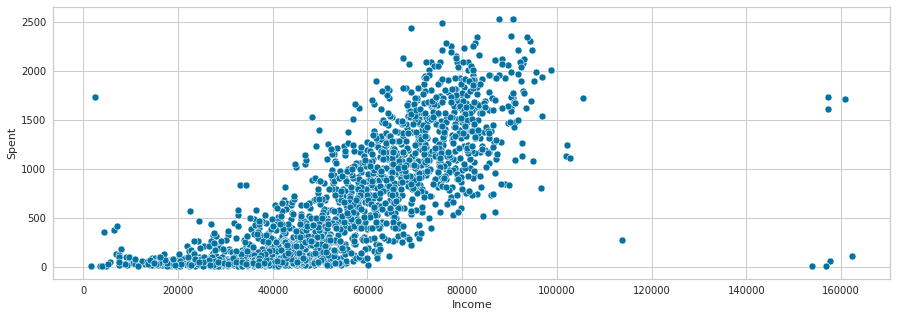

In [22]:
# df["Income"].quantile(0.16)
print(S+f"16% of the customer of this company earn less than 30,000. The median salary is {df['Income'].median():,.0f}. Let's see how much do they spend depending on their salary"+E)

plt.figure(figsize=(15,5))
sns.scatterplot(x="Income",y="Spent",data=df);

As expected, the more the person earns, the more they spend. How about the case where you have children ?





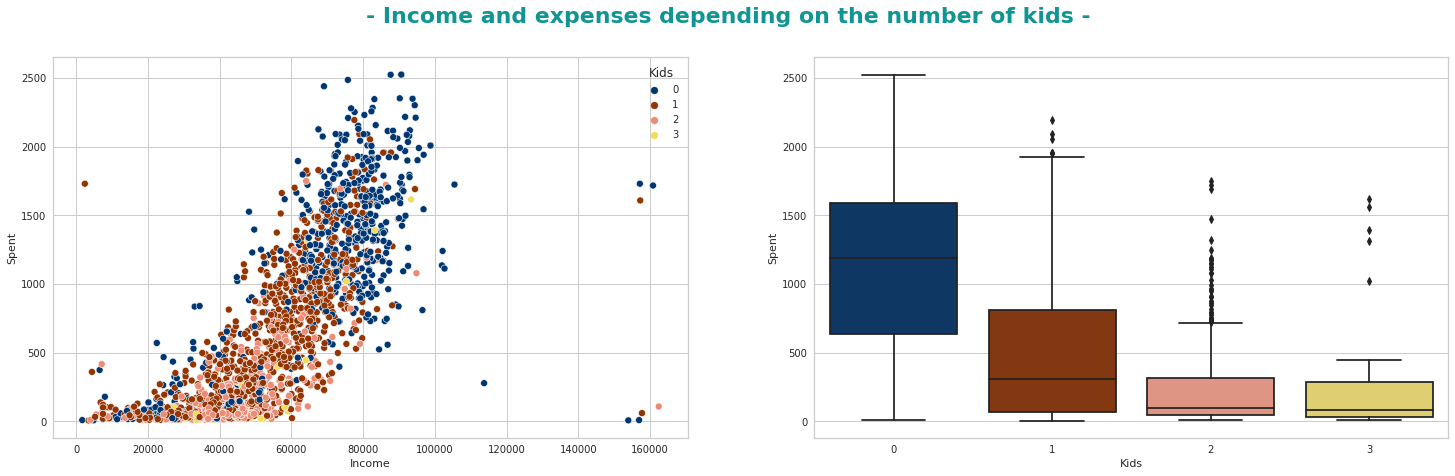

In [23]:
print(S+"As expected, the more the person earns, the more they spend. How about the case where you have children ?\n\n\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("- Income and expenses depending on the number of kids -",size=22,weight="bold", color=palette[4])


sns.scatterplot(x="Income",y="Spent",data=df, hue="Kids", palette=palette[:4], ax=ax1)

sns.boxplot(x="Kids",y="Spent",data=df, palette=palette[:4], ax=ax2);

From these plots, we learn 2 things:

* The more children a person has, the less likely they are to spend money
* Income and kids have a negative correlation : a person with fewer kids generally earn more money and the opposite is true as well

We're going to do the same thing depending on the marital status





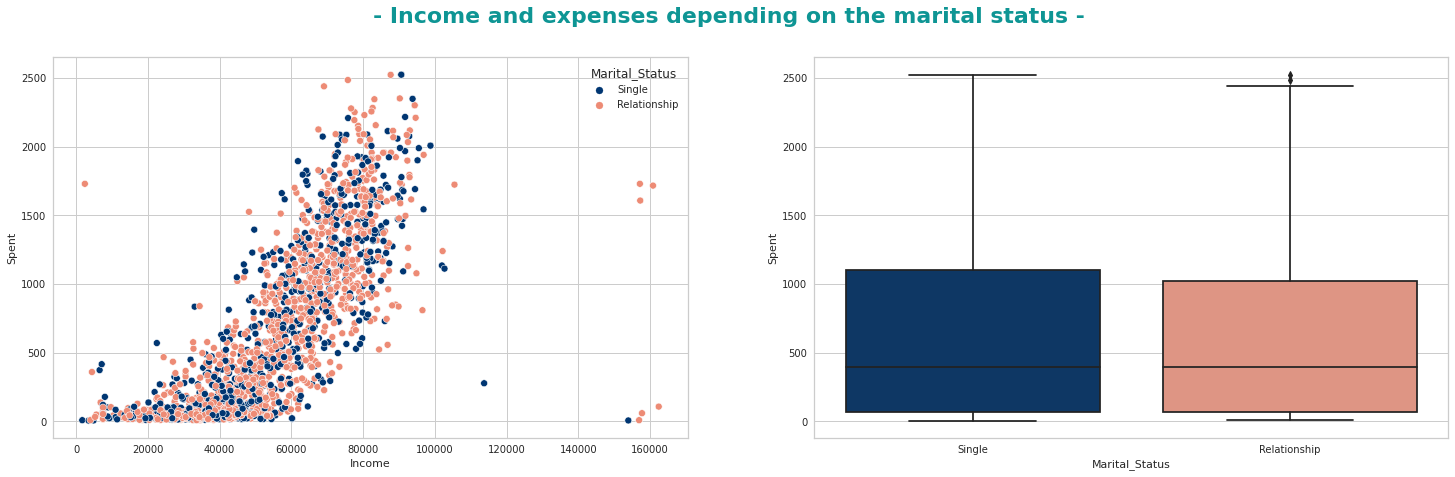

In [24]:
print(S+"We're going to do the same thing depending on the marital status\n\n\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("- Income and expenses depending on the marital status -",size=22,weight="bold", color=palette[4])


sns.scatterplot(x="Income",y="Spent",data=df, hue="Marital_Status", palette=[palette[0],palette[2]], ax=ax1)

sns.boxplot(x="Marital_Status",y="Spent",data=df, palette=[palette[0],palette[2]], ax=ax2);

Finally, we're going to check other factors such as loyalty (those who are clients for longer) and Education : 


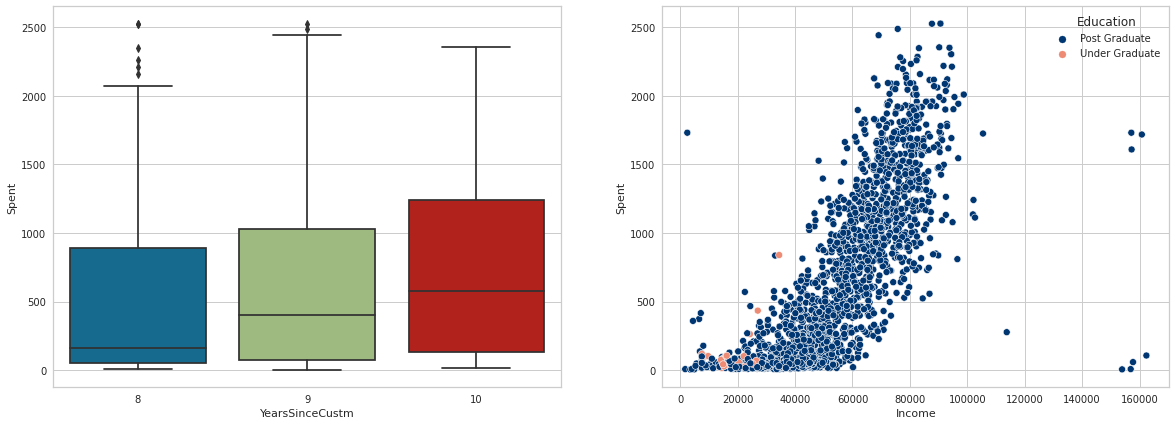

In [25]:
print(S+"Finally, we're going to check other factors such as loyalty (those who are clients for longer) and Education : " +E)

plt.figure(figsize=(20,7))

plt.subplot(121)
sns.boxplot(data=df, y="Spent", x="YearsSinceCustm")

plt.subplot(122)
sns.scatterplot(x="Income",y="Spent",data=df, hue="Education", palette=[palette[0],palette[2]]);

* In addition of being a minority, Under Graduates represent a minority which doesn't spend a lot because they don't earn a lot
* More loyal clients are more likely to spend more money

<a id ="4"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data preprocessing</p>

### Making everything numerical

In [26]:
df.dtypes

Education             object
Marital_Status        object
Income               float64
Recency                int64
NumDealsPurchases      int64
NumWebVisitsMonth      int64
Complain               int64
Response               int64
Age                    int64
Kids                   int64
Spent                  int64
TotalAccepted          int64
YearsSinceCustm        int16
NmbPurch               int64
dtype: object

In [27]:
object_cols = (df.dtypes == 'object')
objects = list(object_cols[object_cols].index)
objects

['Education', 'Marital_Status']

In [28]:
le = LabelEncoder()
for obj in objects:
    df[obj] = df[[obj]].apply(le.fit_transform)

In [29]:
df.dtypes
# all values should be numerical

Education              int64
Marital_Status         int64
Income               float64
Recency                int64
NumDealsPurchases      int64
NumWebVisitsMonth      int64
Complain               int64
Response               int64
Age                    int64
Kids                   int64
Spent                  int64
TotalAccepted          int64
YearsSinceCustm        int16
NmbPurch               int64
dtype: object

### Scaling

In [30]:
ss = StandardScaler()
ss.fit(df)
scaled = pd.DataFrame(ss.transform(df),columns= df.columns )
scaled.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,Spent,TotalAccepted,YearsSinceCustm,NmbPurch
0,-0.158077,1.348357,0.286604,0.310113,0.352088,0.693215,-0.097834,2.377320,0.986016,-1.264487,1.675011,-0.439383,1.500024,1.310473
1,-0.158077,1.348357,-0.261407,-0.380899,-0.167829,-0.131420,-0.097834,-0.420642,1.236344,1.405522,-0.962727,-0.439383,-1.417055,-1.188263
2,-0.158077,-0.741643,0.912723,-0.795506,-0.687745,-0.543738,-0.097834,-0.420642,0.318476,-1.264487,0.279830,-0.439383,0.041484,1.032836
3,-0.158077,-0.741643,-1.176680,-0.795506,-0.167829,0.280897,-0.097834,-0.420642,-1.266933,0.070517,-0.919594,-0.439383,-1.417055,-0.910625
4,-0.158077,-0.741643,0.293806,1.553934,1.391921,-0.131420,-0.097834,-0.420642,-1.016605,0.070517,-0.307440,-0.439383,-1.417055,0.199924


### Reduce memory usage

In [31]:
def reduce_memory_usage(df, verbose=True):
    # from https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering#DATA-PREPROCESSING
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            f"Mem. usage decreased from {start_mem:.2f} Mb to {end_mem:.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)"
        )
    return df

scaled_and_reduced_data = reduce_memory_usage(scaled, verbose=True)

Mem. usage decreased from 0.24 Mb to 0.06 Mb (75.0% reduction)


<a id ="5"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dimensionality Reduction</p>

In [32]:
pca = PCA(n_components=len(scaled_and_reduced_data.columns))
pca.fit(scaled_and_reduced_data);

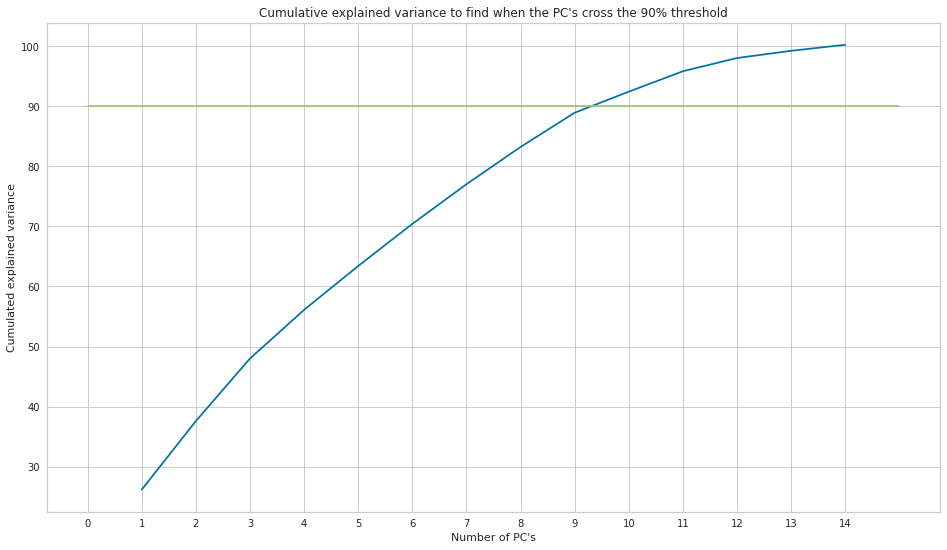

In [33]:
# Eplained variance and Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
cumu_var = np.cumsum(per_var)

plt.figure(figsize=(16,9))
sns.lineplot(x=range(1,15), y=cumu_var)
sns.lineplot(x=[0,15],y=[90,90])
plt.xticks(range(0,15))
plt.xlabel("Number of PC's")
plt.ylabel("Cumulated explained variance")
plt.title("Cumulative explained variance to find when the PC's cross the 90% threshold");

**Based on this, we'll then use 10 Principal Components for clustering, and 3 to visualize the results**

In [34]:
pca_data = pd.DataFrame(pca.transform(scaled_and_reduced_data), columns=["PC"+str(i+1) for i in range(len(scaled_and_reduced_data.columns))]).iloc[:, :10]
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.032326,2.266651,1.040584,0.332455,1.244498,-0.991787,-0.703342,0.030358,-1.145421,-0.443962
1,1.523681,-0.822724,-0.869902,-1.983883,0.710347,-1.055379,-0.378636,0.727639,0.252078,-0.081016
2,-1.524327,-0.751338,-0.330434,0.244487,-0.599730,0.589435,-1.066430,-0.487486,-0.556486,0.295100
3,1.786883,-1.286624,0.465478,-0.644788,-1.039471,0.581144,0.289687,-0.790122,0.641182,0.191855
4,0.373409,-0.355425,-1.249684,0.720903,-0.478452,-0.117475,1.382527,-0.345484,1.533863,-0.459244


In [35]:
vis_data = pd.DataFrame(pca.transform(scaled_and_reduced_data), columns=["PC"+str(i+1) for i in range(len(scaled_and_reduced_data.columns))]).iloc[:, :3]
vis_data.head()

,PC1,PC2,PC3
0,-2.032326,2.266651,1.040584
1,1.523681,-0.822724,-0.869902
2,-1.524327,-0.751338,-0.330434
3,1.786883,-1.286624,0.465478
4,0.373409,-0.355425,-1.249684


In [36]:
fig= px.scatter_3d(vis_data, x="PC1",y="PC2",z="PC3", opacity=0.5)
fig.update_layout(margin=dict(l=0,b=0,r=0,t=0))

<a id ="6"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Clustering</p>

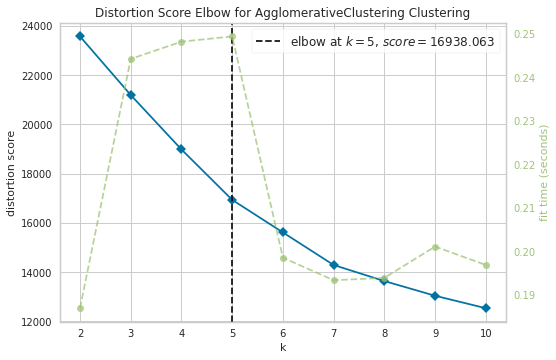

In [37]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=10)
elbow.fit(pca_data)
elbow.show();

In [38]:
ac = AgglomerativeClustering(n_clusters=5)
ac_results = ac.fit_predict(pca_data)
ac_results

array([1, 4, 1, ..., 1, 1, 0])

In [39]:
vis_data["Cluster"] = ac_results
data["Cluster"] = ac_results

In [40]:
fig= px.scatter_3d(vis_data, x="PC1",y="PC2",z="PC3", opacity=0.5, color="Cluster",symbol="Cluster")
fig.update_layout(margin=dict(l=0,b=0,r=0,t=0))

**It seems pretty good, some clusters seem to be overlapping but as a reminder, we're not looking at all of the 10 Principal Components, we only look at the 3 first ones which explain ~45% of the variance**

<a id ="7"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Profiling</p>

In [41]:
data[data["Cluster"]==0]

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,Spent,TotalAccepted,YearsSinceCustm,NmbPurch,Cluster
4,Post Graduate,Relationship,58293.0,94,5,5,0,0,41,1,422,0,8,14,0
6,Post Graduate,Single,55635.0,34,4,6,0,0,51,1,590,0,10,17,0
8,Post Graduate,Relationship,30351.0,19,1,9,0,1,48,1,46,0,9,5,0
13,Post Graduate,Single,59354.0,53,3,6,0,0,70,2,310,0,9,12,0
21,Post Graduate,Relationship,2447.0,42,15,1,0,0,43,1,1730,0,9,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,Post Graduate,Single,57967.0,39,5,5,0,0,60,1,468,0,9,14,0
2231,Post Graduate,Single,44802.0,71,2,8,0,0,52,0,1049,0,10,25,0
2235,Post Graduate,Relationship,61223.0,46,2,5,0,0,55,1,1341,0,9,16,0
2236,Post Graduate,Relationship,64014.0,56,7,7,0,0,76,3,444,1,8,15,0


In [42]:
clusters_details = {}

for cluster in range(5):
    clusters_details[str(cluster)] = {}
    for column in data.columns[2:-1]:
        clusters_details[str(cluster)][column] = round(data[data["Cluster"]==cluster][column].mean(),2)

In [43]:
dict(
    round(
        data[data["Cluster"]==0]["Marital_Status"].value_counts() /
        data[data["Cluster"]==0]["Marital_Status"].shape[0]
        ,2)
)

{'Relationship': 0.62, 'Single': 0.38}

In [44]:
for cluster in range(5):
    for column in data.columns[:2]: 
        column_results = dict(
    round(
        data[data["Cluster"]==cluster][column].value_counts() /
        data[data["Cluster"]==cluster][column].shape[0]
        ,2)
)
        for result in column_results:
            clusters_details[str(cluster)][result] = column_results[result]

In [45]:
pd.DataFrame(clusters_details)

,0,1,2,3,4
Income,55778.56,76697.22,20306.26,45242.29,36009.54
Recency,48.60,48.49,48.44,53.05,49.63
NumDealsPurchases,3.68,1.08,1.80,2.33,2.02
NumWebVisitsMonth,5.96,2.61,6.87,5.81,6.34
Complain,0.00,0.00,0.00,1.00,0.00
Response,0.22,0.31,0.04,0.14,0.00
Age,55.90,54.41,44.54,56.90,50.71
Kids,1.19,0.14,0.72,1.19,1.25
Spent,706.78,1333.09,81.80,376.43,125.01
TotalAccepted,0.27,0.77,0.11,0.14,0.06


In [46]:
data

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,Spent,TotalAccepted,YearsSinceCustm,NmbPurch,Cluster
0,Post Graduate,Single,58138.0,58,3,7,0,1,65,0,1617,0,10,22,1
1,Post Graduate,Single,46344.0,38,2,5,0,0,68,2,27,0,8,4,4
2,Post Graduate,Relationship,71613.0,26,1,4,0,0,57,0,776,0,9,20,1
3,Post Graduate,Relationship,26646.0,26,2,6,0,0,38,1,53,0,8,6,4
4,Post Graduate,Relationship,58293.0,94,5,5,0,0,41,1,422,0,8,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Post Graduate,Relationship,61223.0,46,2,5,0,0,55,1,1341,0,9,16,0
2236,Post Graduate,Relationship,64014.0,56,7,7,0,0,76,3,444,1,8,15,0
2237,Post Graduate,Single,56981.0,91,1,6,0,0,41,0,1241,1,8,18,1
2238,Post Graduate,Relationship,69245.0,8,2,3,0,0,66,1,843,0,8,21,1
